In [1]:
import os
import json
import uuid
import yaml
import streamlit as st
from flask import Flask, request, jsonify, session
from dotenv import load_dotenv
from typing import Annotated, Literal
from typing_extensions import TypedDict
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_chroma import Chroma
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage
from langchain.schema import SystemMessage, HumanMessage
from pyprojroot import here
from PIL import Image
import pytesseract
import fitz  # PyMuPDF
import openai

from PIL import Image  # Import PIL Image module
import pytesseract  

import fitz  # PyMuPDF
from unstructured.partition.pdf import partition_pdf
from unstructured.partition.auto import partition

from unstructured.documents.elements import Table, CompositeElement,Image
from pathlib import Path

/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/botenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/Task (1)/task/data (30).pdf"


In [ ]:
def process_pdf(pdf_path):
    # print(f"Processing: {pdf_path}")
    raw_pdf_elements = partition_pdf(
        filename=pdf_path,
        extract_images_in_pdf=False,
        infer_table_structure=True,
        chunking_strategy="by_title",
        max_characters=4000,
        new_after_n_chars=3800,
        combine_text_under_n_chars=2000,
    )

    # Separate text and table elements
    text_elements = []
    table_elements = []
    for element in raw_pdf_elements:
        if isinstance(element, Table):
            table_elements.append(str(element))
        elif isinstance(element, CompositeElement):
            text_elements.append(str(element))
    
    return text_elements, table_elements



process_pdf_result = process_pdf(pdf_path)

# process_pdf_result =partition(filename=pdf_path,strategy='hi_res',infer_table_structure=True)


In [ ]:
from unstructured.partition.pdf import partition_pdf

# elements = partition_pdf(filename=pdf_path)



150

In [3]:
# element_dict = [el.to_dict() for el in elements]
# output = json.dumps(element_dict, indent=2)
# print(output)

In [4]:
# from unstructured.partition.auto import partition

# elements = partition(filename=pdf_path,
#                      strategy='hi_res',
#            )

# tables = [el for el in elements if el.category == "Table"]

# print(tables[0].text)
# print(tables[0].metadata.text_as_html)

In [27]:
from unstructured.partition.pdf import partition_pdf

elements = partition_pdf(filename=pdf_path,
                         infer_table_structure=True,
                         strategy='hi_res',
           )

tables = [el for el in elements if el.category == "Table"]

print(tables[0].text)
print(tables[0].metadata.text_as_html)

To, To, National Stock Exchange of India Ltd. | The Bombay Stock Exchange Exchange Plaza, C-1, Block G, (BSE Limited) Bandra Kurla Complex, Phiroze Jeejeebhoy Towers Bandra (E), Dalal Street Mumbai — 400 051 Mumbai- 400001 Symbol: UEL Scrip Code: 533644
<table><tbody><tr><td>Symbol: UEL</td><td>Scrip Code: 533644</td></tr></tbody></table>


In [5]:
# from docling.document_converter import DocumentConverter

# converter = DocumentConverter()
# result = converter.convert(pdf_path)

In [6]:
# from langchain_community.document_loaders import PDFPlumberLoader

# loader = PDFPlumberLoader(pdf_path)

In [22]:
# Print each table
for idx, table in enumerate(tables):
    print(f"\nTable {idx + 1}:\n{table}")



Table 1:
To, To, National Stock Exchange of India Ltd. | The Bombay Stock Exchange Exchange Plaza, C-1, Block G, (BSE Limited) Bandra Kurla Complex, Phiroze Jeejeebhoy Towers Bandra (E), Dalal Street Mumbai — 400 051 Mumbai- 400001 Symbol: UEL Scrip Code: 533644

Table 2:
Year to date Corresponding 3 Year to date Year to date 3 Months Preceding 3 figures for ended Months ended twelve the previous year | months ended | months ended months ended 31-12-2024 30-09-2024 31-12-2023 31-12-2024 31-12-2023 31-03-2024 Unaudited Unaudi Unaudited Unaudited Unaudited Audited 1, Revenue from operations z 470.47 916. 1,988.29 2,672.64 2, Other income 3. Total Revenue (1+ Il) 4. Expenses Cost of materials consumed Changes in inventories of finished goods, work-in-progress and stock in trade Employee benefits expense Finance costs Depreciation and amortisation expense Other expenses 99.60 2,087.89 2,614.64 5,287.28 945.99 1,271.59 45.05 279.66 22.94 37.16 906.71 1,597.48 5. Profit before exceptional a

In [15]:
process_pdf_result


from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o')

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o')
input_str = f"Create a solution to extract standalone and consolidated financial statements from the provided text in JSON format the text is: {process_pdf_result}"

result_json = model.invoke(input_str)



[INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:


import json
with open("result_of_json4.json",'w') as f:
    json.dump(result_json.content,f)

To extract standalone and consolidated financial statements from the provided text and represent them in JSON format, we can focus on key elements such as the headers, income, expenses, and other financial metrics mentioned in the text. Below is an example of how the JSON representation could look:

```json
{
  "financial_statements": {
    "standalone": {
      "quarter_ended": "31 December 2024",
      "year_to_date_period_ended": "31 December 2024",
      "year_ended": "31 March 2024",
      "income": {
        "revenue_from_operations": 15437.85,
        "other_income": 599.98,
        "total_income": 16037.83
      },
      "expenses": {
        "cost_of_construction_and_development": 3512.06,
        "changes_in_inventories": 1966.11,
        "employee_benefits_expense": 1530.07,
        "finance_costs": 803.84,
        "depreciation_and_amortisation_expenses": 190.85,
        "other_expenses": 2378.67,
        "total_expenses": 10381.60
      },
      "profit_or_loss_before_tax"

In [41]:
import pdfplumber
pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/Task (1)/task/data (4).pdf"

import pandas as pd
pdf_path
def extract_tables_from_pdf(pdf_path):
    tables = []

    # Open the PDF file
    with pdfplumber.open(pdf_path) as pdf:
        for page_num, page in enumerate(pdf.pages, start=1):
            # Extract tables from the current page
            global extracted_tables
            extracted_tables = page.extract_tables()

            for table in extracted_tables:
                # Convert each table to a DataFrame
                df = pd.DataFrame(table[1:], columns=table[0])  # Use the first row as header
                tables.append((page_num, df))

    return tables


tables = extract_tables_from_pdf(pdf_path)

# Display extracted tables
for idx, (page_num, table) in enumerate(tables):
    print(f"\nTable {idx + 1} on Page {page_num}:")
    print(table)

    # Optionally, save each table to a CSV file
    table.to_csv(f"table_{idx + 1}_page_{page_num}.csv", index=False)



Table 1 on Page 5:
   Subsidiary Companies (Also, refer note 5 to the Statement)  \
0          Satguru Corporate Services Private Limited           
1           Satguru lnfocorp Services Private Limited           
2           Sunteck Property Holdings Private Limited           
3             Sunteck Realty Holdings Private Limited           
4                    Clarissa Facility Management LLP           
5   Sunteck Lifestyle International Private Limite...           
6                    Sunteck Lifestyles Limited (UAE)           
7                  lndustele Property Private Limited           
8                    Sunteck lnfracon Private Limited           
9                Russel Multiventures Private Limited           
10  Sundunes Real Estate Private Limited (w.e.f. 2...           

                                                 None  
0               Sahrish Constructions Private Limited  
1                   Starlight Systems Private Limited  
2                  Starteck Lif

In [40]:
extracted_tables

[]

In [7]:
import tabula


In [13]:
pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/Task (1)/task/data (30).pdf"

dfs = tabula.read_pdf(pdf_path,pages='all')

Got stderr: Mar 14, 2025 6:42:19 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:42:19 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:42:20 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:42:20 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:42:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 14, 2025 6:42:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



In [14]:
for i in range(len(dfs)):
    dfs[i].to_csv(f"all_{i}.csv")

In [15]:
import tabula

# Try with lattice mode
dfs = tabula.read_pdf(pdf_path, pages='all', stream=True)


Got stderr: Mar 14, 2025 6:42:59 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:42:59 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:43:00 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:43:00 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 14, 2025 6:43:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 14, 2025 6:43:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



In [59]:
import cv2
import numpy as np
from pdf2image import convert_from_path
import pytesseract
import pandas as pd

def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    
    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10
    )
    
    return binary

def detect_table_structure(image):
    # Detect horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    horizontal_lines = cv2.morphologyEx(image, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    # Detect vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
    vertical_lines = cv2.morphologyEx(image, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

    # Combine horizontal and vertical lines
    table_structure = cv2.add(horizontal_lines, vertical_lines)
    return table_structure

def extract_cells(image, table_structure):
    # Find contours of the table cells
    contours, _ = cv2.findContours(table_structure, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cells = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 20 and h > 20:  # Filter small noise
            cell = image[y:y+h, x:x+w]
            text = pytesseract.image_to_string(cell, config='--psm 6').strip()
            cells.append((x, y, w, h, text))

    # Sort cells based on position (top-to-bottom, then left-to-right)
    cells = sorted(cells, key=lambda item: (item[1], item[0]))
    return cells

def convert_cells_to_dataframe(cells):
    # Convert extracted cells to a structured DataFrame
    data = []
    row = []
    prev_y = None

    for _, y, _, _, text in cells:
        if prev_y is None or abs(y - prev_y) <= 10:
            row.append(text)
        else:
            data.append(row)
            row = [text]
        prev_y = y
    data.append(row)

    # Convert to DataFrame
    return pd.DataFrame(data)

def extract_table_from_pdf(pdf_path):
    images = convert_from_path(pdf_path)
    all_tables = []

    for idx, image in enumerate(images):
        processed_image = preprocess_image(image)
        table_structure = detect_table_structure(processed_image)
        cells = extract_cells(processed_image, table_structure)

        if cells:
            df = convert_cells_to_dataframe(cells)
            all_tables.append((idx + 1, df))
    
    return all_tables


tables = extract_table_from_pdf(pdf_path)

# Display and save the extracted tables
for idx, (page_num, table) in enumerate(tables):
    print(f"\nExtracted Table from Page {page_num}:")
    print(table)

    # Optionally, save to CSV
    table.to_csv(f"table_page_{page_num}.csv", index=False)



Extracted Table from Page 1:
                                                   0
0                                             a\nEva
1  To, To,\n\nNational Stock Exchange of India Lt...

Extracted Table from Page 2:
                                  0
0  OL I SA SS CS RS SS SS SSS Sf ee

Extracted Table from Page 4:
                                                   0
0  Year to date.\n3 Months Preceding 3 Correspond...
1                                                   

Extracted Table from Page 5:
                                                   0
0                                                   
1  Precedi aing’s | Yeartodate | veartovdate | Ye...

Extracted Table from Page 6:
  0
0  

Extracted Table from Page 7:
                                                   0
0  | 00 Siilcmeht{on Impact of Audit Qualifiandon...
1                             od |\ned\n\nting\nns .
2                                                   
3  ic. Frequency of qualification: appeared-first..

In [60]:
import cv2
import numpy as np
from pdf2image import convert_from_path
import pytesseract
import pandas as pd
import re

def preprocess_image(image):
    """Convert image to grayscale and apply adaptive thresholding."""
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    binary = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10
    )
    return binary

def enhance_lines(binary_img):
    """Enhance horizontal and vertical lines to detect table structure."""
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel)

    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
    vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel)

    table_structure = cv2.add(horizontal_lines, vertical_lines)
    return table_structure

def extract_table_cells(image, table_structure):
    """Extract table cells based on contours."""
    contours, _ = cv2.findContours(table_structure, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cells = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 40 and h > 20:
            cell_img = image[y:y + h, x:x + w]
            text = pytesseract.image_to_string(cell_img, config='--psm 6').strip()
            cleaned_text = clean_text(text)
            cells.append((x, y, cleaned_text))
    # Sort cells by their position (top to bottom, left to right)
    return sorted(cells, key=lambda item: (item[1], item[0]))

def clean_text(text):
    """Clean and format extracted text."""
    text = re.sub(r'[\[\]\{\}]', '', text)  # Remove brackets
    text = re.sub(r'\s+', ' ', text)        # Replace multiple spaces with a single space
    text = re.sub(r'[^\d\w\.\-\/]', '', text)  # Remove unwanted characters
    return text.strip()

def group_cells_into_rows(cells):
    """Group extracted cells into structured rows."""
    rows = []
    current_row = []
    prev_y = None

    for x, y, text in cells:
        if prev_y is None or abs(y - prev_y) <= 10:
            current_row.append(text)
        else:
            rows.append(current_row)
            current_row = [text]
        prev_y = y
    if current_row:
        rows.append(current_row)
    return pd.DataFrame(rows)

def extract_tables_from_pdf(pdf_path):
    """Extract tables from each page of a PDF."""
    images = convert_from_path(pdf_path)
    all_tables = []

    for page_num, image in enumerate(images, start=1):
        preprocessed = preprocess_image(image)
        table_structure = enhance_lines(preprocessed)
        cells = extract_table_cells(preprocessed, table_structure)

        if cells:
            table_df = group_cells_into_rows(cells)
            all_tables.append((page_num, table_df))

    return all_tables


    


extracted_tables = extract_tables_from_pdf(pdf_path)

# Display and Save Tables
for page_num, table in extracted_tables:
    print(f"\nExtracted Table from Page {page_num}:")
    print(table)
    table.to_csv(f"extracted_table_page_{page_num}.csv", index=False)



Extracted Table from Page 1:
                                                    0     1     2
0                                                      None  None
1                                                            None
2                                                   p        None
3                                                   a        None
4   ToToNationalStockExchangeofIndiaLtd.TheBombayS...  None  None
5                                                  EZ        None
6                                                  eS        None
7                                                   p  None  None
8                                                   a        None
9                                                            None
10                                                  P  None  None
11                                                  p        None
12                                                  p        None
13                                            

In [1]:
pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/Task (1)/task/data (30).pdf"

In [2]:
import camelot
import tabula

In [16]:
for i in range(len(dfs)):
    dfs[i].to_csv(f"all_{i}.csv")
    

In [9]:
# dfs = tabula.read_pdf(pdf_path, pages='all',
#                       multiple_tables=True,
#                       stream=True,
#                         guess=False, lattice=True)

# dfs

import pdfplumber
# loader = PDFPlumberLoader(pdf_path)

# for i in range(len(dfs)):
#     dfs[i].to_csv(f"all_{i}.csv")


with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        tables_on_pages = page.extract_table()
        if tables_on_pages:
            for table in tables_on_pages:
                if table:
                    print(table)


    


['', None]
['', None]
['', None]
['', None]
['', None]
[None, '']


In [ ]:
!pip install llmwhisperer-client



In [ ]:
whisperer_api_key = "V4zgBMZqi3N3xLcVEaI3e84Ykx8_9wOW5cA9g-6or7Q"

import time
from unstract.llmwhisperer import LLMWhispererClientV2

client = LLMWhispererClientV2(base_url="https://llmwhisperer-api.us-central.unstract.com/api/v2",
                              api_key=whisperer_api_key)


2025-03-18 11:43:36,364 - unstract.llmwhisperer.client_v2 - DEBUG - logging_level set to DEBUG
2025-03-18 11:43:36,365 - unstract.llmwhisperer.client_v2 - DEBUG - base_url set to https://llmwhisperer-api.us-central.unstract.com/api/v2


In [27]:
pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/Task (1)/task/data (4).pdf"
result_llmwhisperer = client.whisper(file_path=pdf_path)

2025-03-18 11:53:10,066 - unstract.llmwhisperer.client_v2 - DEBUG - whisper called
2025-03-18 11:53:10,067 - unstract.llmwhisperer.client_v2 - DEBUG - api_url: https://llmwhisperer-api.us-central.unstract.com/api/v2/whisper
2025-03-18 11:53:10,067 - unstract.llmwhisperer.client_v2 - DEBUG - params: {'mode': 'form', 'output_mode': 'layout_preserving', 'page_seperator': '<<<', 'pages_to_extract': '', 'median_filter_size': 0, 'gaussian_blur_radius': 0, 'line_splitter_tolerance': 0.4, 'horizontal_stretch_factor': 1.0, 'mark_vertical_lines': False, 'mark_horizontal_lines': False, 'line_spitter_strategy': 'left-priority', 'add_line_nos': False, 'lang': 'eng', 'tag': 'default', 'filename': '', 'webhook_metadata': '', 'use_webhook': ''}


In [28]:
while True:
    status = client.whisper_status(whisper_hash=result_llmwhisperer['whisper_hash'])
    if status['status']=='processed':
        resultx  = client.whisper_retrieve(
            whisper_hash=result_llmwhisperer['whisper_hash']
        )
        break
    time.sleep(5)


2025-03-18 11:53:15,885 - unstract.llmwhisperer.client_v2 - DEBUG - whisper_status called
2025-03-18 11:53:15,885 - unstract.llmwhisperer.client_v2 - DEBUG - url: https://llmwhisperer-api.us-central.unstract.com/api/v2/whisper-status
2025-03-18 11:53:21,292 - unstract.llmwhisperer.client_v2 - DEBUG - whisper_status called
2025-03-18 11:53:21,295 - unstract.llmwhisperer.client_v2 - DEBUG - url: https://llmwhisperer-api.us-central.unstract.com/api/v2/whisper-status
2025-03-18 11:53:27,148 - unstract.llmwhisperer.client_v2 - DEBUG - whisper_status called
2025-03-18 11:53:27,149 - unstract.llmwhisperer.client_v2 - DEBUG - url: https://llmwhisperer-api.us-central.unstract.com/api/v2/whisper-status
2025-03-18 11:53:27,718 - unstract.llmwhisperer.client_v2 - DEBUG - whisper_retrieve called
2025-03-18 11:53:27,719 - unstract.llmwhisperer.client_v2 - DEBUG - url: https://llmwhisperer-api.us-central.unstract.com/api/v2/whisper-retrieve


In [32]:
resultx

{'status_code': 200,
 'extraction': {'confidence_metadata': [[],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [{'confidence': '0.887', 'offset': 576, 'text': '15:50:38', 'width': 88}],
   [],
   [],
   [{'confidence': '0.893', 'offset': 350, 'text': 'Encl:', 'width': 107}],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [{'confidence': '0.576', 'offset': 1996, 'text': 'III ', 'width': 37}],
   [],
   [],
   [{'confidence': '0.784', 'offset': 1858, 'text': '-', 'width': 16}],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [{'confidence': '0.886', 'offset': 1087, 'text': "('the", 'width': 76}],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   []

In [24]:
extracted_text = resultx['extraction']['result_text']

In [26]:
resultx

{'status_code': 200,
 'extraction': {'confidence_metadata': [[{'confidence': '0.404',
     'offset': 101,
     'text': '[ ]',
     'width': 70}],
   [],
   [{'confidence': '0.579', 'offset': 101, 'text': '[ ]', 'width': 70}],
   [{'confidence': '0.514', 'offset': 102, 'text': '[ ]', 'width': 67}],
   [],
   [],
   [{'confidence': '0.344', 'offset': 101, 'text': '[ ]', 'width': 69}],
   [],
   [{'confidence': '0.344', 'offset': 102, 'text': '[ ]', 'width': 67}],
   [{'confidence': '0.448', 'offset': 102, 'text': '[ ]', 'width': 69}],
   [],
   [{'confidence': '0.583', 'offset': 102, 'text': '[ ]', 'width': 68}],
   [],
   [{'confidence': '0.451', 'offset': 103, 'text': '[ ]', 'width': 65}],
   [],
   [{'confidence': '0.357', 'offset': 100, 'text': '[ ]', 'width': 72}],
   [{'confidence': '0.729', 'offset': 101, 'text': '[ ]', 'width': 70}],
   [],
   [{'confidence': '0.579', 'offset': 104, 'text': '[ ]', 'width': 63}],
   [{'confidence': '0.659', 'offset': 102, 'text': '[ ]', 'width': 6

In [ ]:
p

In [ ]:
# !pip install PyPDF2
import PyPDF2

with open(pdf_path,'rb') as f:
    pdf_reader = PyPDF2.PdfReader(f)

    for i in range(10):
        page = pdf_reader.pages[i]
        pages_text = page.extract_tables

In [46]:
for i in range(10):
    page = pdf_reader.pages[i]
    # pages_text = page.extract_tables


ValueError: seek of closed file

In [48]:
import fitz  # PyMuPDF
import pytesseract
from PIL import Image
import numpy as np
import pandas as pd
import io

pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/Task (1)/task/data (20).pdf"


# Initialize PDF reader
pdf_document = fitz.open(pdf_path)

# Store extracted text
extracted_tables = []

# Iterate through PDF pages
for page_num in range(len(pdf_document)):
    print(f"Processing Page {page_num + 1}...")

    # Extract images from the page
    page = pdf_document.load_page(page_num)
    images = page.get_images(full=True)

    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = pdf_document.extract_image(xref)
        image_bytes = base_image["image"]

        # Convert image bytes to PIL image
        image = Image.open(io.BytesIO(image_bytes))

        # Convert image to grayscale for better OCR
        image = image.convert("L")

        # Apply OCR
        extracted_text = pytesseract.image_to_string(image)

        # Store the extracted text
        extracted_tables.append(extracted_text)

# Close PDF
pdf_document.close()

# Combine all extracted text
full_text = "\n".join(extracted_tables)

# Print the extracted text
print("\nExtracted Text from Tables:\n")
print(full_text)

# Save to a text file
with open("output.txt", "w") as f:
    f.write(full_text)

# Optional: Convert to DataFrame if the tables have a structured format
# Example: Converting tabular data into DataFrame
table_data = [line.split() for line in full_text.split("\n") if line.strip()]
df = pd.DataFrame(table_data)
print("\nDataFrame from Extracted Text:\n")
print(df.head())

# Save the DataFrame to CSV
df.to_csv("output.csv", index=False)


Processing Page 1...
Processing Page 2...
Processing Page 3...
Processing Page 4...

Extracted Text from Tables:

< Kamadgiri Fashion Ltd

Regd. Office: 202, Rajan House, 2nd Floor, Appa Saheb Marathe Marg, Prabhadevi, Mumbai - 400025
Tel. : (+91 22) 6666 2904 | Email Id : cs@kfiindia.com | Website : www.kflindia.com | CIN : L17120MH1987PLC042424

WOOD BIPUIADEISy :[rewy
GOZOOBERZL “IAL TReIND ‘pes|en ‘|Z L96E - UoeBJaquiy ‘peoy Ihaq ebued ‘Z/Ep 9 L/h ‘SHOM

beb2v00 14286 HINO 1211 ‘NID
WODRIPUIPY MMM | WODRIPUI@NIUOD ‘WOO 'eIPUIIYDS WT | pBL2 bLEY / bOBe 9999 (22 16+) “IAL
“GZ2000b -!eqUINW ‘IAapeYgeld ‘BueW ayyereW qayes eddy Yooy pug ‘asnoy ueleY ‘202 :291yO ‘pbay

1099011q Sujzeuep 'Z UeWTEYD

7 AF

poywy) uojysey 4j3pewey 104 "gz0z ‘St Auenues :93eq
pieog 6y) J0 28p10 Ag {equiny :e081d

*einBy s,poyed yuewno YM e]qeredwoo Wel) exe 0} Alessedeu palapisuod JaAesayM paBueleas/padnolzes used aAey SauNBy s,polad SNOIAaId = &

“801 SV GNI Jad se quatuZas ajqeyoday ajesedas ou s| a1auyy 

In [50]:
!pip install pymupdf

In [52]:
import pymupdf

result = pymupdf.open(pdf_path)

In [54]:
result.metadata

{'format': 'PDF 1.7',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': '',
 'producer': 'iLovePDF',
 'creationDate': "D:20250115143812+05'30'",
 'modDate': "D:20250115143812+05'30'",
 'trapped': '',
 'encryption': None}

In [71]:
result[4].find_tables().tables

IndexError: page 4 not in document

In [14]:
import camelot
pdf_path = "/media/brainwired/D/BW_ML/01_AUG_FARM_TEST/study/GenAIbased_Financial_StatementExtraction/page_4.pdf"
tables = camelot.read_pdf(pdf_path, pages='all', flavor='lattice')
# tables[0].to_csv("output.csv")
# print(tables[0].df)


In [12]:
import tabula
dfs = tabula.read_pdf(pdf_path, lattice=True)

'pages' argument isn't specified.Will extract only from page 1 by default.


In [13]:
dfs

[]

In [ ]:
tables[0].df


,0,1,2,3
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,"2,889.84]",,"5,287.28 \n— 2,087.89]",
6,a,a,,
7,,,,
8,ee es ee,,eee,
9,,,,


: 

In [15]:
from pdf2image import convert_from_path
import pytesseract

def is_scanned_pdf(pdf_path):
    images = convert_from_path(pdf_path, first_page=1, last_page=1)
    text = pytesseract.image_to_string(images[0])
    return len(text.strip()) == 0  # If no text, it's likely scanned

print(is_scanned_pdf(pdf_path))




import pytesseract
from pdf2image import convert_from_path

def extract_text_from_scanned_pdf(pdf_path):
    images = convert_from_path(pdf_path)
    text = ""
    for img in images:
        text += pytesseract.image_to_string(img)
    return text

scanned_text = extract_text_from_scanned_pdf(pdf_path)
print(scanned_text)


False
Reporting on Segment-wise Revenue, Results, Assets and Liabilities for the Quarter and period ended 31st December, 2024 -

Part Il

Quarter Ended Nine Months Ended

Year to date
figures for

Corresponding 3 | Yeartodate | Yearto date
months ended in | figures for nine|figures for nine
the previous year | months ended | months ended

Preceding

3 Months

ee 3 Months

ended

twelve
months ended

31-12-2024 | 30-09-2024 | 31-12-2023 | 31-12-2024 | 31-12-2023 | 31-03-2024
|_Unaudited | Unaudited | Unaudited | Unaudited _| Unaudited | Audited _
. Net Segment Revenue AS A A | RN:
a) Solar Power Plant Operation
b) Manufacturing and sale of Solar Power Systems pS (US.7ayf 52228653) 745.21
(c) EV
(d) Un-allocable Income 5963 47.08} 8G. 75] 150.67] 83.52] 110.67,
Total Revenue 4,187.98] 630.29] 622.49] 2,889.84] 2,087.89] 5,287.28
from each segment
i a i i is ee
(QC 0.03) 5.31) 06 | (18.28)) 26.35] 15.07
1861.10} (86.75) 1,781.31] (175.70)
ee, es (OS (OS (OS (Se
Less: 2 ee eee eee eee eee


In [22]:
# import camelot

# def extract_tables(pdf_path):
#     # First, try lattice (best for bordered tables)
#     tables = camelot.read_pdf(pdf_path, pages='all', flavor='lattice')
#     if not tables:
#         # If lattice fails, try stream (for borderless tables)
#         tables = camelot.read_pdf(pdf_path, pages='all', flavor='stream')
#     return tables

# tables = extract_tables(pdf_path)


# for i, table in enumerate(tables):
#     print(f"Table {i+1}")
#     print(table.df)


In [23]:
for i in range(len(tables)):
    print(tables[i].df
          )



    

                                                   0  \
0  To, \nNational Stock Exchange of India Ltd. \n...   
1                                        Symbol: UEL   

                                                   1  
0  To, \nThe Bombay Stock Exchange \n(BSE Limited...  
1                                 Scrip Code: 533644  


In [36]:
data1 = {"Statement_Consolidated_finanacial_results_for_all_months": {
        "Quarter ended 31 December 2024": {
            "Revenue from operations": 16175.71,
            "Other income": 1301.15,
            "Total income": 17476.86,
            "Cost of construction and development": 6272.52,
            "Changes in inventories of work-in-progress and finished properties": 1275.2,
            "Employee benefit expense": 2743.89,
            "Finance costs": 874.35,
            "Depreciation and amortisation expenses": 312.6,
            "Other expenses": 3596.12,
            "Total expenses": 12524.2,
            "Profit/loss before tax and share of profit/loss of joint ventures": 4952.66,
            "Share of profit/loss of joint ventures, net": 11.2,
            "Profit/loss before tax": 4941.42,
            "Current tax": 277.46,
            "Deferred tax": 411.9,
            "Profit/loss for the period/year": 4252.06,
            "Other comprehensive income/loss": 473.84,
            "Total comprehensive income/loss for the period/year, net of tax": 4725.9
        },
}}

data2 = {
    "Standalone_financial_results_for_all_months": {
        "Quarter ended 31 December 2024": {
            "Revenue from operations": 15437.85,
            "Other income": 599.98,
            "Total income": 16037.83,
            "Cost of construction and development": 3512.06,
            "Changes in inventories of work-in-progress and finished properties": 1966.11,
            "Employee benefit expense": 1530.07,
            "Finance costs": 803.84,
            "Depreciation and amortisation expenses": 190.85,
            "Other expenses": 2378.67,
            "Total expenses": 10381.6,
            "Profit/loss before tax": 5656.23,
            "Current tax": 179.0,
            "Deferred tax": 661.59,
            "Profit/loss for the period/year": 4815.64,
            "Other comprehensive income/loss": 4.69,
            "Total comprehensive income/loss for the period/year, net of tax": 4810.95
        },
    }}


data = {
    "Standalone_financial_results_for_all_months": {
        "Quarter Ended": {
            "3 Months ended 31-12-2024": {
                "Revenue from operations": 816.84,
                "Other income": 371.14,
                "Total Revenue": 1187.98,
                "Cost of materials consumed": 131.9,
                "Changes in inventories of finished goods, work in-progress and stock in trade": 0.0,
                "Employee benefits expense": 96.53,
                "Finance costs": 10.01,
                "Depreciation and amortisation expense": 12.73,
                "Other expenses": 247.95,
                "Total Expenses": 499.12,
                "Profit before exceptional and extraordinary items and tax": 688.86,
                "Exceptional Items": 0.0,
                "Profit/ Loss before tax from continuing operations": 688.86,
                "Tax Expense from continuing operations": 295.59,
                "Profit/ Loss for the period from continuing operations": 393.27,
                "Profit/Loss before tax from discontinued operations": 0.0,
                "Tax Expense from discontinued operations": 0.0,
                "Profit/Loss for the period from discontinued operations": 0.0,
                "Other comprehensive income": 0.47,
                "Total comprehensive income": 393.74,
                "Paid-up equity share capital": 1066.27,
                "Earnings per equity share (Continuing Operations)": {
                    "Basic": 0.37,
                    "Diluted": 0.37
                },
                "Earnings per equity share (Discontinued Operaions)": {
                    "Basic": 0.0,
                    "Diluted": 0.0
                }
            },
                "Year to date figures for twelve months ended 31-03-2024": {
                "Revenue from operations": 2672.64,
                "Other income": 2614.64,
                "Total Revenue": 5287.28,
                "Cost of materials consumed": 1271.59,
                "Changes in inventories of finished goods, work in-progress and stock in trade": 45.05,
                "Employee benefits expense": 284.56,
                "Finance costs": 1046.4,
                "Depreciation and amortisation expense": 1077.6,
                "Other expenses": 3764.5,
                "Total Expenses": 4478.2,
                "Profit before exceptional and extraordinary items and tax": 809.08,
                "Exceptional Items": 963.4,
                "Profit/ Loss before tax from continuing operations": 154.32,
                "Tax Expense from continuing operations": 3049.89,
                "Profit/ Loss for the period from continuing operations": 2895.57,
                "Profit/Loss before tax from discontinued operations": 0.0,
                "Tax Expense from discontinued operations": 0.0,
                "Profit/Loss for the period from discontinued operations": 0.0,
                "Other comprehensive income": 3.04,
                "Total comprehensive income": 2892.53,
                "Paid-up equity share capital": 1053.01,
                "Earnings per equity share (Continuing Operations)": {
                    "Basic": 1.83,
                    "Diluted": 1.83
                },
                "Earnings per equity share (Discontinued Operaions)": {
                    "Basic": 0.0,
                    "Diluted": 0.0
                }
            },
        }
    }
}

In [37]:
scanned_text
pattern1 = r'STATEMENT OF CONSOLIDATED'
pattern2 = r'STATEMENT OF STANDALONE'
model = ChatOpenAI(model='gpt-4o')
input_str = (
                f"Extract the {pattern2} or {pattern1} financial statements from the provided text and output only the JSON structure and value should be in positive. and do not \n"
                f"you type statement is not clear then you need to anlaysis"
                f"Ignore any extra text. Here is an example for reference: {data}. "
                f"Perform similar extraction for all rows. The input table is: {scanned_text}.")
            
result_json  =model.invoke(str(input_str))

In [38]:
result_json.content


'```json\n{\n  "Standalone_financial_results_for_all_months": {\n    "Quarter Ended": {\n      "3 Months ended 31-12-2024": {\n        "Revenue from operations": 470.47,\n        "Other income": 99.60,\n        "Total Revenue": 570.07,\n        "Cost of materials consumed": 945.99,\n        "Changes in inventories of finished goods, work in-progress and stock in trade": 0.0,\n        "Employee benefits expense": 279.66,\n        "Finance costs": 22.94,\n        "Depreciation and amortisation expense": 37.16,\n        "Other expenses": 906.71,\n        "Total Expenses": 2192.46,\n        "Profit before exceptional and extraordinary items and tax": 0.0,\n        "Exceptional Items": 0.0,\n        "Profit/ Loss before tax from continuing operations": 0.0,\n        "Tax Expense from continuing operations": 165.13,\n        "Profit/ Loss for the period from continuing operations": 0.0,\n        "Profit/Loss before tax from discontinued operations": 0.0,\n        "Tax Expense from discontinu

In [100]:
from langchain_openai import ChatOpenAI

import regex as re
pattern = r'STATEMENT OF CONSOLIDATED'
model = ChatOpenAI(model='gpt-4o')


import json
input_str = f"Create a solution to extract standalone and consolidated financial statements from the provided text in JSON format the text is: {process_pdf_result}"

import regex as re


pattern1 = r'STATEMENT OF CONSOLIDATED'
pattern2 = r'STATEMENT OF STANDALONE'
pattern3 = r"BALANCE SHEET"
pattern4 = r"CASH FLOW STATEMENT"



for i in range(len(tables)):
    if tables[i].shape[0] == 15:
        input_str = tables[i].df.to_string()

        print("Table Content:\n", input_str)

        # Perform the regex search (case-insensitive)
        match1 = re.search(pattern, input_str, flags=re.IGNORECASE)
        match2 = re.search(pattern, input_str, flags=re.IGNORECASE)

        # if match1:
        #     print("yes")
        input_str = (
                f"Extract the {pattern2} or {pattern1} financial statements from the provided text and output only the JSON structure and value should be in positive. "
                f"you type statement is not clear then you need to anlaysis"
                f"Ignore any extra text. Here is an example for reference: {data1}. "
                f"Perform similar extraction for all rows. The input table is: {input_str}.")
            
        result_json  =model.invoke(str(input_str))
        # print(result_json.content)
        # print("_____________________________")
        

        # if match2:
        #     print("not")
        #     input_str = (
        #         f"Extract the {pattern2} financial statements from the provided text and output only the JSON structure and value should be in positive. "
        #         f"Ignore any extra text. Here is an example for reference: {data2}. "
        #         f"Perform similar extraction for all rows. The input table is: {input_str}.")
            
        #     result_json  =model.invoke(str(input_str))
        #     print(result_json.content)
    
        

# result_json = model.invoke(input_str)
# with open(f"result_{i}.json",'w') as f:
#     json.dump(result_json.content,f)

Table Content:
                          0  1  2  3  4  5      6  7  8                                                                                9  10                                                                                                                         11
0                                                                                                                                            nn\n16\nor \nO?l\n,6)'O\n16d\nlllaF.r\n,o,o\n!'r\n6 \nor^\nr.1\n(o \n,rl \n,o\n+rr\nrn  .o\n!n \ntl \nco co\no- \n.i \n.i
1                                                                                                                                                                                                                                                                     
2                                                                                                                                                                                                  

In [99]:
result_json.content

"Based on the provided text, it's not possible to identify any clear financial statement data. The input seems to be jumbled or incomplete, and it lacks the necessary structure to extract any standalone or consolidated financial statement information into a JSON format. If you have a different or more structured input, please provide it for accurate processing."

In [ ]:
!git clone https://huggingface.co/datasets/upstage/dp-bench

!cd dp-bench

!pip install markdown requests beautifulsoup4

Cloning into 'dp-bench'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 425 (delta 13), reused 0 (delta 0), pack-reused 381 (from 1)
Receiving objects: 100% (425/425), 4.50 MiB | 3.27 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Filtering content: 100% (200/200), 35.16 MiB | 2.66 MiB/s, done.


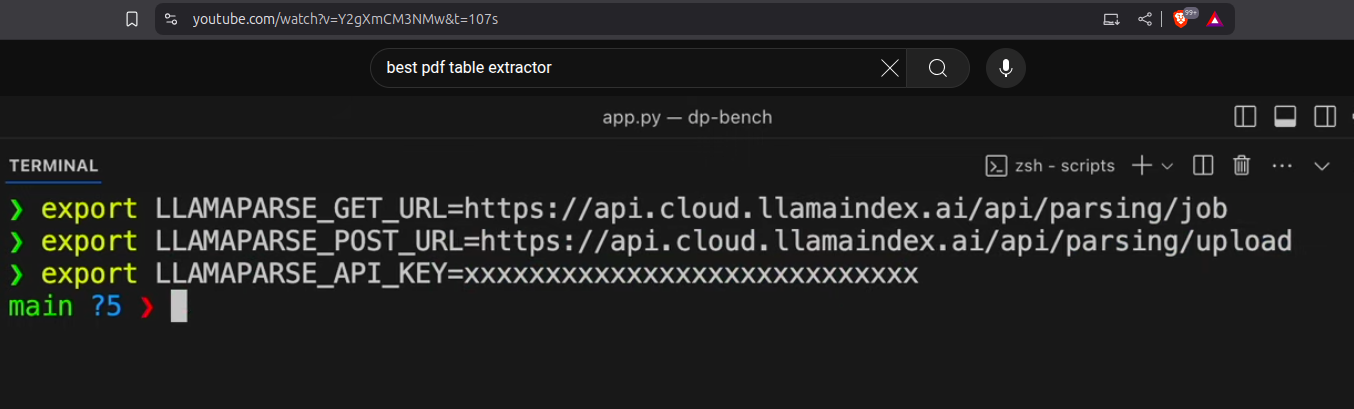

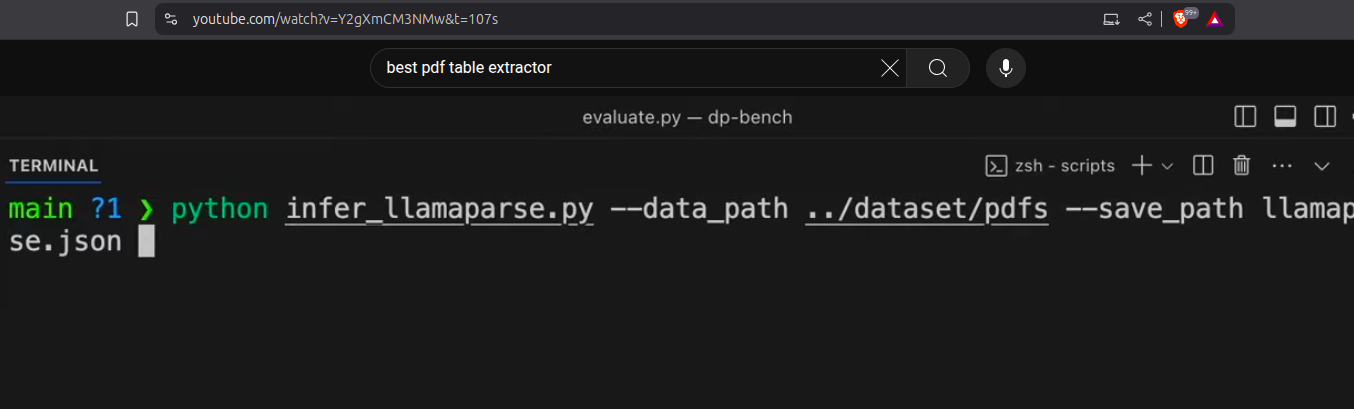

In [ ]:
!export LLAMAPARSE_GET_URL = https://api.cloud.llamaindex.ai/api/parsing/job
!export LLAMAPARSE_POST_URL = https://api.cloud.llamaindex.ai/api/parsing/upload
!export LLAMAPARSE_API_KEY = llx-VsvHa8ddV0yMs5ehOB5CMwJGbZGQP13YhJawCuItQdAMQxs4

/bin/bash: line 1: export: `=': not a valid identifier
/bin/bash: line 1: export: `https://api.cloud.llamaindex.ai/api/parsing/job': not a valid identifier
/bin/bash: line 1: export: `=': not a valid identifier
/bin/bash: line 1: export: `https://api.cloud.llamaindex.ai/api/parsing/upload': not a valid identifier
/bin/bash: line 1: export: `=': not a valid identifier
/bin/bash: line 1: export: `llx-VsvHa8ddV0yMs5ehOB5CMwJGbZGQP13YhJawCuItQdAMQxs4': not a valid identifier
